# SIFT

In [32]:
#importing libraries
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:

df = pd.read_csv("./HoG_FeatureFinal.csv")

In [24]:
df

,0,1,2,3,4,Class
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
604,0,0,0,0,1,2
605,0,1,0,0,0,2
606,0,1,0,0,0,2
607,0,0,0,0,1,2


In [25]:
#replace No Otherlang and Otherlang to 0 and 1

df['Class']

0      0
1      0
2      0
3      0
4      0
      ..
604    2
605    2
606    2
607    2
608    2
Name: Class, Length: 609, dtype: int64

In [26]:
rows,columns=df.shape

In [27]:
df.shape

(609, 6)

In [28]:
df.head()

,0,1,2,3,4,Class
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [29]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [30]:
# statistical measures about the data
df.describe()

,0,1,2,3,4,Class
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.320197,0.305419,0.029557,0.073892,0.270936,1.226601
std,0.466936,0.460963,0.169500,0.261809,0.444808,0.735305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


1    249
2    249
0    111
Name: Class, dtype: int64

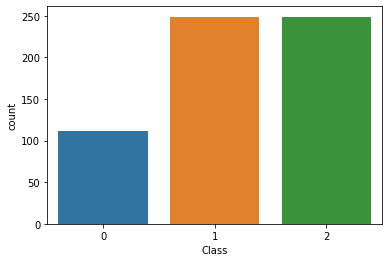

In [33]:
ax=sns.countplot(x='Class',data=df)

df['Class'].value_counts()

In [34]:
target='Class'

In [35]:
#train with handling imbalanced data using Near miss
print("Before Undersampling")
df['Class'].value_counts()

Before Undersampling


1    249
2    249
0    111
Name: Class, dtype: int64

In [36]:
minority_class_len=len(df[df[target]==0]) 

print(minority_class_len)

111


In [37]:
majority_class_indices=df[df[target]==1].index
print(majority_class_indices)

Int64Index([111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
            ...
            350, 351, 352, 353, 354, 355, 356, 357, 358, 359],
           dtype='int64', length=249)


In [38]:
random_majority_indices =np.random.choice(majority_class_indices,
                                          minority_class_len,
                                          replace=False)

print(len(random_majority_indices))

111


In [39]:
random_majority_indices =np.random.choice(majority_class_indices,
                                          minority_class_len,
                                          replace=False)

print(len(random_majority_indices))

111


In [40]:
minority_class_indices = df[df[target]==0].index
print(minority_class_indices)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
           dtype='int64', length=111)


In [41]:

undersample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [42]:
undersample = df.loc[undersample_indices]

<AxesSubplot:xlabel='Class', ylabel='count'>

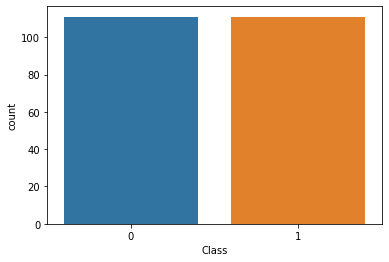

In [43]:
sns.countplot(x=target,data=undersample)

In [44]:
df=undersample

In [45]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [46]:
X

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
254,0,0,0,0,1
233,1,0,0,0,0
302,0,0,0,0,1
355,0,1,0,0,0


In [47]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
254    1
233    1
302    1
355    1
196    1
Name: Class, Length: 222, dtype: int64

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (155, 5)
Number transactions y_train dataset:  (155,)
Number transactions X_test dataset:  (67, 5)
Number transactions y_test dataset:  (67,)


In [49]:
print(X.shape) 
print(X_train.shape)
print(X_test.shape)

(222, 5)
(155, 5)
(67, 5)


In [50]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix

c:\Users\sumit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


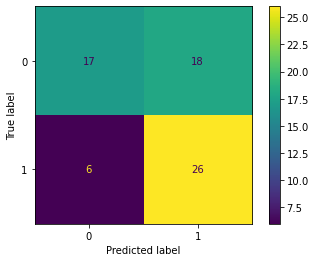


Results obtained for the logistic regression on undersampled/balanced data

Results obtained on Training Data
Accuracy on Train data :  0.6
Presion : 0.7215189873417721
Recall : 0.5876288659793815
F1 score :  0.6477272727272727

Results obtained on Testing Data
Accuracy on Test data :  0.6417910447761194
Presion : 0.8125
Recall : 0.5909090909090909
F1 score :  0.6842105263157896




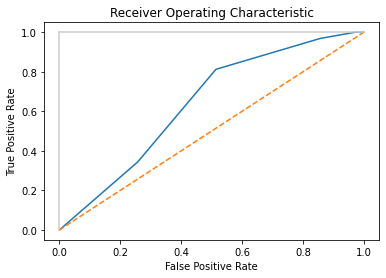

In [51]:
model = LogisticRegression(solver= 'liblinear')
model.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(model, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the logistic regression on undersampled/balanced data')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))

print('\n')

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = model.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

c:\Users\sumit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


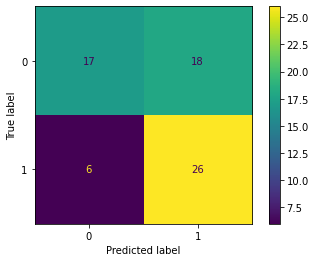

Accuracy on Train data :  0.6
Presion : 0.7215189873417721
Recall : 0.5876288659793815
F1 score :  0.6477272727272727
Accuracy on Test data :  0.6417910447761194
Presion : 0.8125
Recall : 0.5909090909090909
F1 score :  0.6842105263157896


In [52]:
modelSVM=SVC(kernel='poly')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))

c:\Users\sumit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


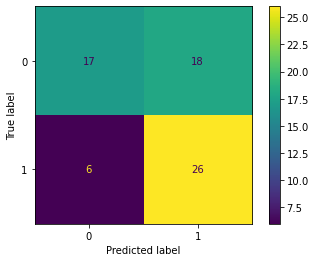

Accuracy on Train data :  0.6
Presion : 0.7215189873417721
Recall : 0.5876288659793815
F1 score :  0.6477272727272727
Accuracy on Test data :  0.6417910447761194
Presion : 0.8125
Recall : 0.5909090909090909
F1 score :  0.6842105263157896


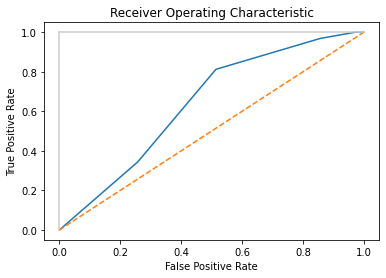

In [53]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# HoG

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, exposure
import pandas as pd
import os
from sklearn.cluster import KMeans

In [12]:
temp = ['Bowlegs', 'Knock Knees', 'Normal Knee']
for j in temp:
    for filename in os.listdir('./train/Preprocessed/' + j):
        img = cv2.resize(cv2.imread('./train/Preprocessed/' + j + '/' + filename, 0), (256, 256))
        #initialise HoG descriptor
        cell_size = (32, 32)  # h x w in pixels
        block_size = (2, 2)  # h x w in cells
        nbins = 9  # number of orientation bins


        # winSize is the size of the image cropped to an multiple of the cell size
        # cell_size is the size of the cells of the img patch over which to calculate the histograms
        # block_size is the number of cells which fit in the patch

        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                        img.shape[0] // cell_size[0] * cell_size[0]),
                    _blockSize=(block_size[1] * cell_size[1],
                                block_size[0] * cell_size[0]),
                    _blockStride=(cell_size[1], cell_size[0]),
                    _cellSize=(cell_size[1], cell_size[0]),
                    _nbins=nbins)


        descriptor = hog.compute(img)
        out=pd.DataFrame(descriptor)

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        out = out.transpose()
        csv_data=out.to_csv('HoG_' + j + '.csv', mode='a', header=False, index=False, type = 'uint8')
        


In [15]:
data1 = pd.read_csv('./HoG_Bowlegs.csv')
data2 = pd.read_csv('./HoG_Knock Knees.csv')
data3 = pd.read_csv('./HoG_Normal Knee.csv')

"""data1 = data1.astype('uint8')
data2 = data2.astype('uint8')
data3 = data3.astype('uint8')"""

"data1 = data1.astype('uint8')\ndata2 = data2.astype('uint8')\ndata3 = data3.astype('uint8')"

In [17]:
#performing kmeans on each class
#apple
kmeans1 = KMeans(n_clusters=5)
kmeans1.fit(data1)

#mango
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(data2)

#papaya
kmeans3 = KMeans(n_clusters=5)
kmeans3.fit(data3)

KMeans(n_clusters=5)

In [18]:
hist1=np.histogram(kmeans1.labels_,bins=[0,1,2,3,4,5])
hist2=np.histogram(kmeans2.labels_,bins=[0,1,2,3,4,5])
hist3=np.histogram(kmeans3.labels_,bins=[0,1,2,3,4,5])

print('histogram of bowed')
print(hist1,"\n")

print('histogram of knocked')
print(hist2,"\n")

print('histogram of normal')
print(hist3,"\n")

histogram of bowed
(array([28, 30,  9, 10, 33], dtype=int64), array([0, 1, 2, 3, 4, 5])) 

histogram of knocked
(array([ 6, 60, 58, 68, 56], dtype=int64), array([0, 1, 2, 3, 4, 5])) 

histogram of normal
(array([68, 36, 35, 58, 51], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [ ]:
#performing kmeans prediction of the entire apple dataset with the pretrained kmeans model
#initialising i=0; as its the first class
i=0
input0 = 'train/Preprocessed/'
for j in temp:
    data=[]
    for filename in os.listdir(input0 + j):
        path = input0 + j + '/' + filename
        a=cv2.imread(path)
        resize=(256,256)
        img=cv2.resize(a,resize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #initialise sift descriptor
        cell_size = (32, 32)  # h x w in pixels
        block_size = (2, 2)  # h x w in cells
        nbins = 9  # number of orientation bins


        # winSize is the size of the image cropped to an multiple of the cell size
        # cell_size is the size of the cells of the img patch over which to calculate the histograms
        # block_size is the number of cells which fit in the patch

        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                        img.shape[0] // cell_size[0] * cell_size[0]),
                    _blockSize=(block_size[1] * cell_size[1],
                                block_size[0] * cell_size[0]),
                    _blockStride=(cell_size[1], cell_size[0]),
                    _cellSize=(cell_size[1], cell_size[0]),
                    _nbins=nbins)


        descriptor = hog.compute(img)
        out=pd.DataFrame(descriptor)

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        out = out.transpose()
        
        #predict values of feature vector with pretrained kmeans
        #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
        array_double = np.array(out, dtype=np.double)

        a=kmeans1.predict(array_double)
        hist=np.histogram(a,bins=[0,1,2,3,4,5])
        #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
        data.append(hist[0])
    
    #convert Array to Dataframe and append to the list
    Output = pd.DataFrame(data)
    #add row class 
    Output["Class"] = i 
    csv_data=Output.to_csv('HoG_'+ j + 'Final.csv', mode='a', index=False)
    i += 1

In [21]:
final = pd.read_csv('./HoG_BowlegsFinal.csv')
temp1 = final.append(pd.read_csv('./HoG_Knock KneesFinal.csv'))
tc = pd.read_csv('./HoG_Normal KneeFinal.csv')
tcc = temp1.append(tc)

csv_data = tcc.to_csv('HoG_FeatureFinal.csv', mode='a', index=False)
print(tcc)

     0  1  2  3  4  Class
0    0  0  0  1  0      0
1    0  0  0  1  0      0
2    0  1  0  0  0      0
3    0  0  0  0  1      0
4    0  1  0  0  0      0
..  .. .. .. .. ..    ...
244  0  0  0  0  1      2
245  0  1  0  0  0      2
246  0  1  0  0  0      2
247  0  0  0  0  1      2
248  0  1  0  0  0      2

[609 rows x 6 columns]


C:\Users\sumit\AppData\Local\Temp\ipykernel_8412\2610469491.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp1 = final.append(pd.read_csv('./HoG_Knock KneesFinal.csv'))
C:\Users\sumit\AppData\Local\Temp\ipykernel_8412\2610469491.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tcc = temp1.append(tc)


In [22]:
df = pd.read_csv("./HoG_FeatureFinal.csv")